In [1]:
%load_ext iawk

In [2]:
%cat coins.txt

   gold     1    1986  USA                 American Eagle
   gold     1    1908  Austria-Hungary     Franz Josef 100 Korona
   silver  10    1981  USA                 ingot
   gold     1    1984  Switzerland         ingot
   gold     1    1979  RSA                 Krugerrand
   gold     0.5  1981  RSA                 Krugerrand
   gold     0.1  1986  PRC                 Panda
   silver   1    1986  USA                 Liberty dollar
   gold     0.25 1986  USA                 Liberty 5-dollar piece
   silver   0.5  1986  USA                 Liberty 50-cent piece
   silver   1    1987  USA                 Constitution dollar
   gold     0.25 1987  USA                 Constitution 5-dollar piece
   gold     1    1988  Canada              Maple Leaf


## Historical totals

Make an dictionary with key as the country given in the 4th column and count the number of times a `gold` was earned. Also add together points earned for gold, given in the 2nd column.

In [3]:
%%awk coins.txt
BEGIN {
    print "Country,gold_count,gold_points"
}
/gold/ {
    gold_count[$4]++
    gold_points[$4] += $2
}
END {
    for (i in gold_count)
        print i", "gold_count[i]", "gold_points[i]
}

'Country,gold_count,gold_points\nUSA, 3, 1.5\nPRC, 1, 0.1\nAustria-Hungary, 1, 1\nCanada, 1, 1\nSwitzerland, 1, 1\nRSA, 2, 1.5\n'

In [4]:
from io import StringIO
import pandas as pd

# output of the previous operation as a StringIO buffer
with StringIO(_) as output:
    df = pd.read_csv(output, index_col="Country")

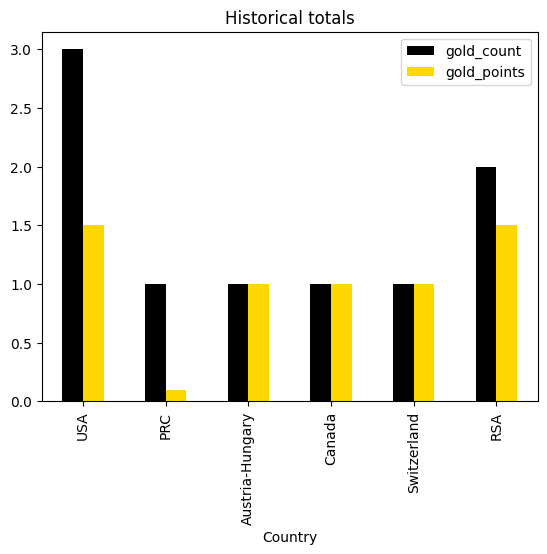

In [5]:
df.plot.bar(title="Historical totals", color=["k", "gold"])

## Points tally by the year

Plot points earned by the year (3rd column) by USA

In [6]:
%cat coins.txt

   gold     1    1986  USA                 American Eagle
   gold     1    1908  Austria-Hungary     Franz Josef 100 Korona
   silver  10    1981  USA                 ingot
   gold     1    1984  Switzerland         ingot
   gold     1    1979  RSA                 Krugerrand
   gold     0.5  1981  RSA                 Krugerrand
   gold     0.1  1986  PRC                 Panda
   silver   1    1986  USA                 Liberty dollar
   gold     0.25 1986  USA                 Liberty 5-dollar piece
   silver   0.5  1986  USA                 Liberty 50-cent piece
   silver   1    1987  USA                 Constitution dollar
   gold     0.25 1987  USA                 Constitution 5-dollar piece
   gold     1    1988  Canada              Maple Leaf


In [7]:
%%awk coins.txt
BEGIN {
    print "Year,gold_points,silver_points"
}
/USA/ {
    total_points[$3] = $2  
    if ($1 == "gold") gold_points[$3] += $2
    if ($1 == "silver") silver_points[$3] += $2

}
END {
    for (i in total_points)
        print i", "gold_points[i]", "silver_points[i]
}

'Year,gold_points,silver_points\n1981, , 10\n1986, 1.25, 1.5\n1987, 0.25, 1\n'

In [8]:
with StringIO(_) as output:
    df = pd.read_csv(output, index_col="Year", na_values=[" "])

df.fillna(0, inplace=True)
df

,gold_points,silver_points
Year,,
1981,0.00,10.0
1986,1.25,1.5
1987,0.25,1.0


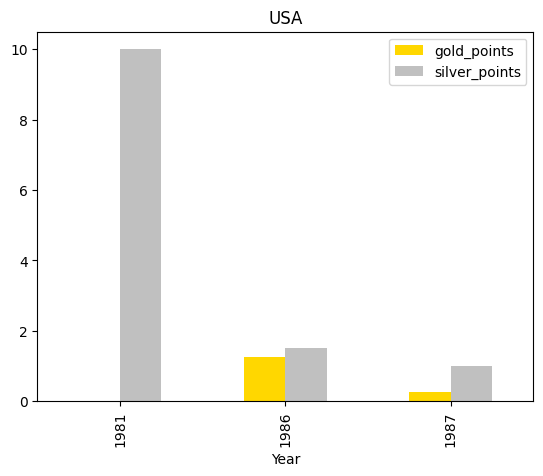

In [9]:
df.plot.bar(title="USA", color=["gold", "silver"])